1. Assignment on Regression technique
Download temperature data from below link. https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv
This data consists of temperatures of INDIA averaging the temperatures of all places month wise. Temperatures values are recorded in CELSIUS
A. Apply Linear Regression using suitable library function and predict the Month-wise temperature.
B. Assessthe performance of regression models using MSE, MAE and R-Square metrics
C. Visualize simple regression model.

Data collection , data description , data wrangling

output feature is decided by problem statement

only 1 i/p feature for linear regression by finding corelation ; the one with he highest co relation is required

training error will be less n tsting errors will be more if we have less training set

calculate training MSE N testing MSE(8) plot training vs testing error; which will be the best fit found through mean (its a simple linear regression)whether input feature is linear to output feature or not

In [ ]:
#performance measure by MSE MAE Rsquare; regression line is predicted values (scatter plot)

In [11]:
hin= "\u0930\u094B\u0936\u0928\u0940 \u0917\u094C\u0921\u093C"
print("Developed by",hin)

Developed by रोशनी गौड़


In [3]:
hin= "\u0930\u094B\u0936\u0928\u0940"
print("Developed by",hin)

Developed by रोशनी


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#this is data collection
temp = pd.read_csv("C:\\Users\\SMILE\\Documents\\temperatures.csv")
temp

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [23]:
#this is data description
temp.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [25]:
#check the null values
print("\nNull values:\n",temp.isnull().sum())


Null values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [35]:
#chck data types
print("\ndata types:\n",temp.dtypes)


data types:
 YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


In [41]:
#remove rows with null values
enrich=temp.dropna()
#show the cleaned data
print("\nCleaned data is here with:\n",temp.head())


Cleaned data is here with:
    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


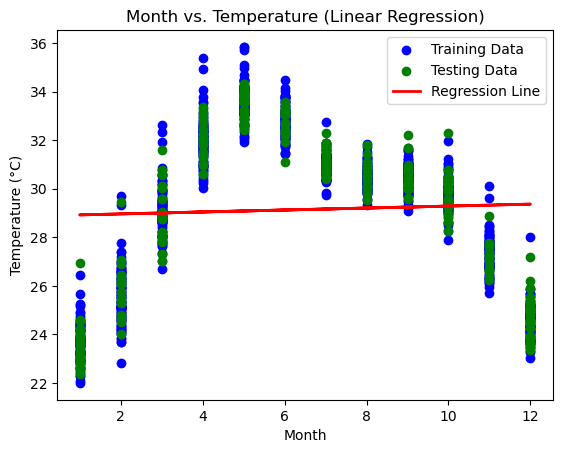

In [69]:
#whether input feature is linear to output feature or not
plt.scatter(X_train['Month_num'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['Month_num'], y_test, color='green', label='Testing Data')
plt.plot(X_train['Month_num'], y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Month vs. Temperature (Linear Regression)')
plt.legend()
plt.show()

In [51]:
# Reshape the data for month-wise temperatures
months = temp.columns[1:13]  # JAN to DEC
df_melted = temp.melt(id_vars=['YEAR'], value_vars=months, var_name='Month', value_name='Temperature')

# Convert 'Month' to a categorical variable
df_melted['Month'] = pd.Categorical(df_melted['Month'], categories=months, ordered=True)
df_melted['Month_num'] = df_melted['Month'].cat.codes + 1  # JAN=1, FEB=2, ..., DEC=12

In [53]:
X = df_melted[['Month_num']]  # Feature: Month number
y = df_melted['Temperature']  # Target: Temperature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#applying PCA Principle Componnt Analysis
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#linear regression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}") # mean square error
print(f"Testing MSE: {test_mse}") # mean absolute error

Training MSE: 10.176945094750216
Testing MSE: 9.999806682283976


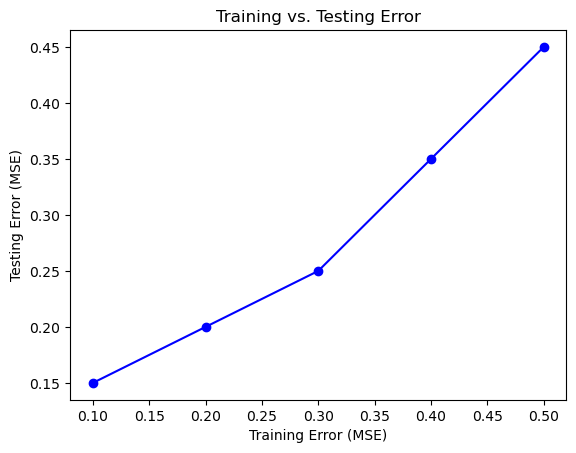

In [74]:
# Plot the training error on the x-axis and testing error on the y-axis
plt.plot(train_mse, test_mse, marker='o', linestyle='-', color='blue')

plt.xlabel('Training Error (MSE)')
plt.ylabel('Testing Error (MSE)')
plt.title('Training vs. Testing Error')
plt.show()